<a href="https://colab.research.google.com/github/jonathan-pap/Data-Analyst-Udacity/blob/main/tmdb_movie_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Investigation of TMDB movie dataset


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The TMDb movie dataset contains information of around 10,000 movies, information is the dataset includes movie budget, revenue, Runtime, release date/year, ratings and also information of cast and directors.

I will go through the follow steps:

- Gather Data
- Clean Data
- Explore
- Draw conclusions

### Questions

#### 1. Number of Movies released by year ?
#### 2. What Average yearly budget & revenue ?
#### 3. What Average yearly profits ?
#### 4. What are the most profitable movies ?
#### 5. Most Popular movies?
#### 6. Is there correlation between budget & profit?
#### 7. Average Runtimes by year?


<a id='wrangling'></a>
## Wrangling

In [ ]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


% matplotlib inline

#reading the dataset
df = pd.read_csv('tmdb-movies.csv')

In [ ]:
#disply the first few row to check the data structure
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [ ]:
# check the total number of rows and columns
df.shape

(10866, 21)

By viewing the first few we can see now what the information is held withe the dataset, lets look at the basic information and check what we should be cleaning to answers the proposed questions. One column is missing and is profit / loss we can create this later.

We can first look at the data types and missing values (null)

In [ ]:
# datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Looking at the summary of missing values, I will choose not do change or correct the missing data from the below columns, and choose to drop these as they have no relavance for the data analyis, 

* imbdb_id, 
* homepage,
* tagline,
* keywords,
* overview,


I will also drop *budget_adj, revenue_adj* as these will have have no relevence in the analysis.
Also there is no profit column we can create this, from the budget and revenue. This will be used to in our analysis later.

The Release_appears to be a string value, we can check this and change later.

Another value that could hinder the conclusion process is checking for any '0' values we can view the statistics of each column.

In [ ]:
#check data type of release_date
type(df['release_date'][0])

str

In [ ]:
# show statistics if the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In the main columns for example, budget and revenue that we need for the data analysis there are "0" values, we can also visualise this also to check other columns.

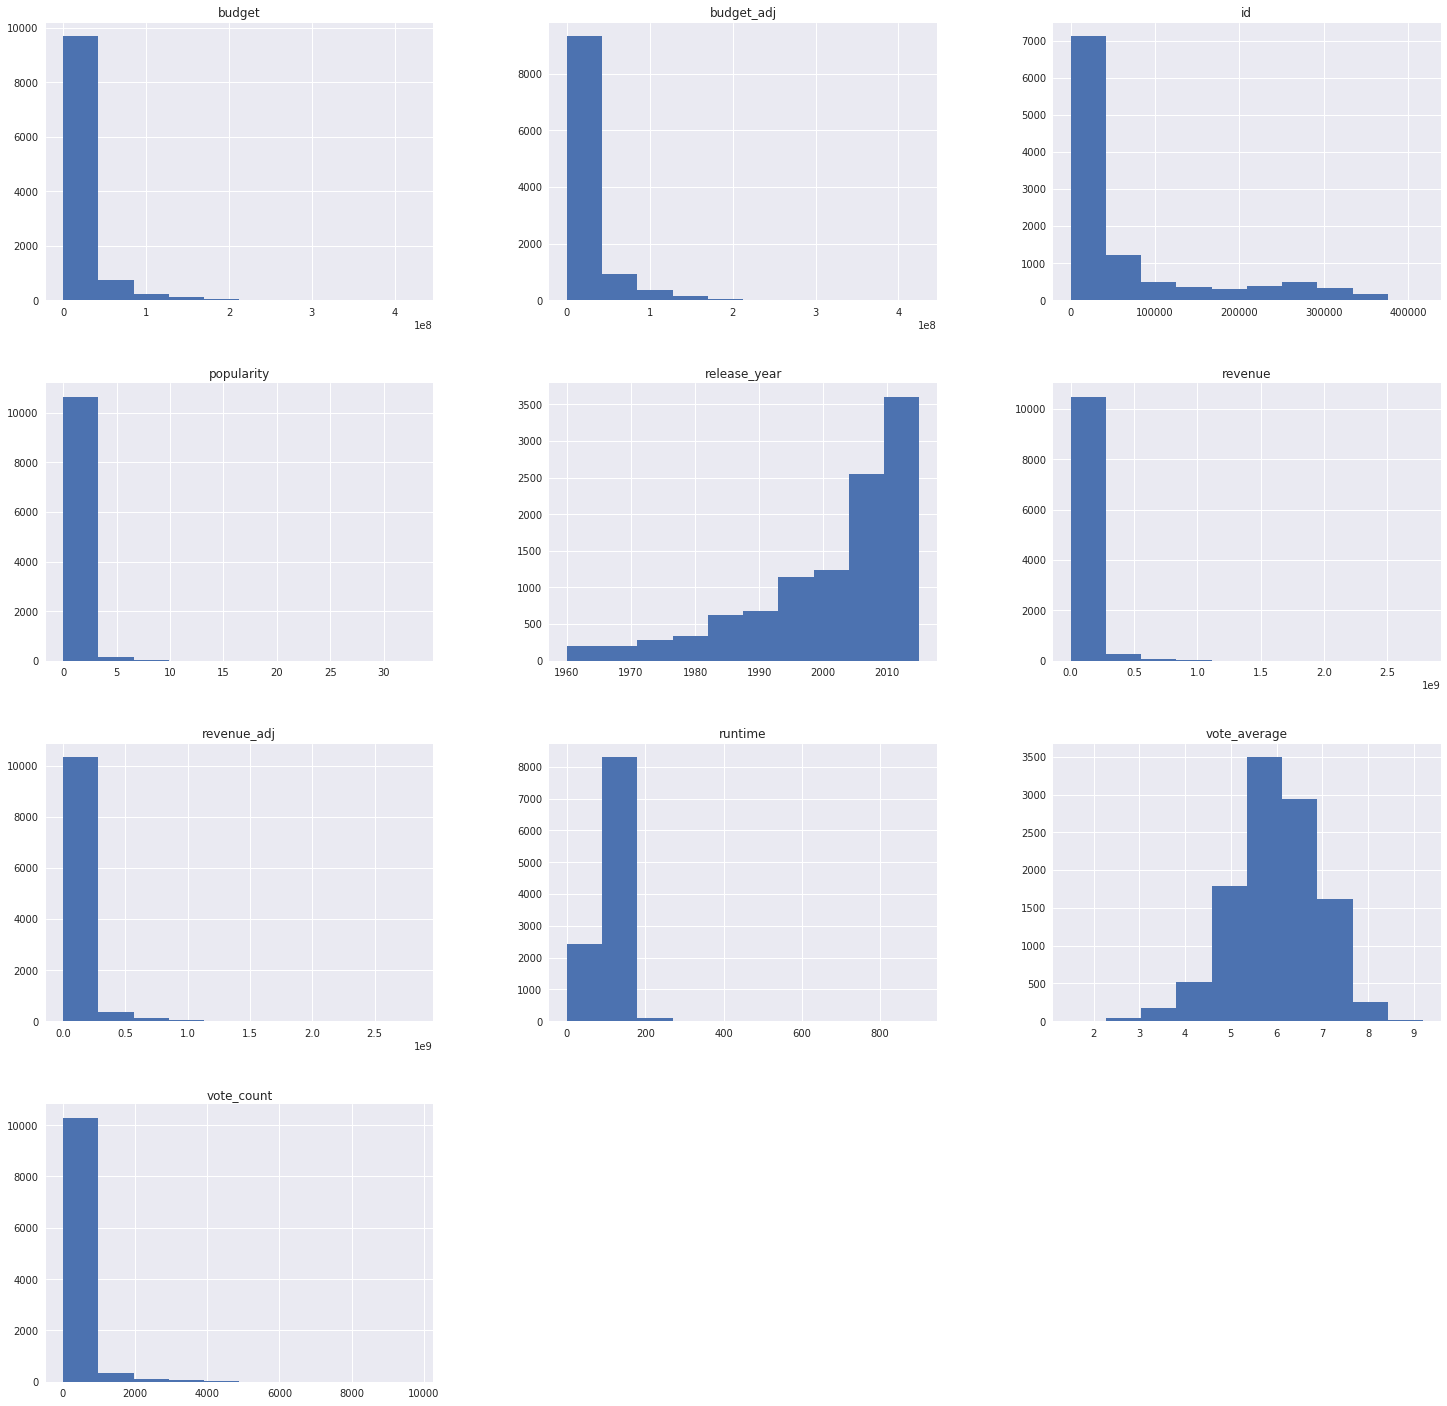

In [ ]:
df.hist(figsize = (25,25));

Lets count the number of zero values per column, reference source:
- https://stackoverflow.com/questions/29229600/counting-number-of-zeros-per-row-by-pandas-dataframe

In [ ]:
#checks and sums the "0"
df.isin([0]).sum()

id                         0
imdb_id                    0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
homepage                   0
director                   0
tagline                    0
keywords                   0
overview                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

on the upper bound there are 6016 rows in the revenue column, deleting these rows could take away alot of useful information, we will make these a values Null values. 

are the runtimes with zero connected to any needed data? we can check this.

In [ ]:
#queary runtime on 0 values.
zero_check = df.query('runtime == 0')
zero_check

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
334,361931,tt5065822,0.357654,0,0,Ronaldo,Cristiano Ronaldo,http://www.ronaldothefilm.com,Anthony Wonke,Astonishing. Intimate. Definitive.,...,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015,0.000000e+00,0.0
410,339342,tt2948712,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,NaN,Kenny Gage|Devon Downs,NaN,...,Six young college hopefuls vacationing and par...,0,Horror,NaN,1/1/15,15,5.6,2015,0.000000e+00,0.0
445,353345,tt3800796,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,NaN,Steven R. Monroe,NaN,...,Taking place years after The Haunting of Molly...,0,Horror,WT Canada Productions,10/9/15,52,5.0,2015,0.000000e+00,0.0
486,333653,tt4058368,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,NaN,Nancy Savoca,NaN,...,The third installment in V.C. Andrewsâ€™ bests...,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,4/5/15,11,5.4,2015,0.000000e+00,0.0
595,341051,tt2914740,0.028725,0,0,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,http://deepdarkmovie.com,Michael Medaglia,NaN,...,Fantasy - A failed sculptor discovers a strang...,0,Horror,NaN,1/1/15,11,4.6,2015,0.000000e+00,0.0
616,325843,tt4333210,0.026797,0,0,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,NaN,Michael Goldfine,NaN,...,The film follows a trio of varsity baseball pl...,0,Drama|Comedy,NaN,11/10/15,20,6.6,2015,0.000000e+00,0.0
1241,296370,tt3024964,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,NaN,NaN,...,DANCE-OFF is a tongue-in-cheek family comedy s...,0,Romance|Music|Comedy,NaN,1/1/14,18,5.7,2014,0.000000e+00,0.0
1289,286372,tt1791681,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,http://www.imdb.com/title/tt1791681/,Michael G. Bartlett,No kids allowed,...,A teenage boy discovers the perpetrators of se...,0,Thriller|Horror|Mystery,Tiberius Film,10/20/14,16,3.4,2014,2.993546e+06,0.0
1293,286256,tt3134058,0.036904,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,NaN,Mauro Lima,Original language PORTUGUESE,...,"Biopic of Brazilian singer Tim Maia, from his ...",0,Documentary|Drama|Music,Globo Filmes,10/30/14,14,6.0,2014,0.000000e+00,0.0


The "0 " values in runtime, are also in the same rows where either or both budget / revnue have zero values.
as the count of rows is small i will drop these rows.

Next wil check for any duplicated rows in the dataset.

In [ ]:
# sum of dupelicated rows
sum(df.duplicated())

1

### Cleaning

Here we will start cleaning the data, first step i will remove the columns that are neot needed for the analysis.

#### Drop columns

In [ ]:
#drop the selected columns
df.drop(['id','imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [ ]:
#confirm that the columns have been dropped
df.head(0)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


#### Drop duplicates

In [ ]:
#Drop the duplicates
df.drop_duplicates(inplace=True)

#check again to confirm duplicates have been dropped should return '0'
sum(df.duplicated())

0

#### Replace 0 value with null

First will drop the runtime null values

In [ ]:
#replace zero values to null and delete rows.
df['runtime'].replace(0, np.NAN, inplace=True)
df.runtime.isnull().sum()
df.dropna(inplace =True)

Next to replace zeros from the budget and revenue columns

In [ ]:
#replace 'zero values' and drop the rows accordingly from the dataset.
df['revenue'].replace(0, np.NAN, inplace=True)
df['budget'].replace(0, np.NAN, inplace=True)
#delete the null values.
delete = ['budget','revenue']
df.dropna(subset = delete, inplace = True)

now we have cleaned up some data, lets recheck to see if there are any "0" values remaining and that the changes from zero to null is made.

In [ ]:
#checks and sums the "0"
df.isin([0]).sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [ ]:
#check final rows avaialble for analysis and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 13 columns):
popularity              3805 non-null float64
budget                  3805 non-null float64
revenue                 3805 non-null float64
original_title          3805 non-null object
cast                    3805 non-null object
director                3805 non-null object
runtime                 3805 non-null float64
genres                  3805 non-null object
production_companies    3805 non-null object
release_date            3805 non-null object
vote_count              3805 non-null int64
vote_average            3805 non-null float64
release_year            3805 non-null int64
dtypes: float64(5), int64(2), object(6)
memory usage: 416.2+ KB


This looks ok now, we will have 3805 entries to work with however this is big loss and can be a big limitation,next i will create the pofit / loss column, and change the release_date to date date type

#### Create profit / loss column & change data type of release date

In [ ]:
# correcting the release year data type.
df['release_date'] = pd.to_datetime(df['release_date'])

#confirming the change
print(type(df['release_date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
# create prof_loss column, subtract budget from the revenue
df['prof_loss'] = df['revenue']-df['budget']

In [ ]:
#display top to rows
df.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,prof_loss
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.363529e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,2.284364e+08


Save a copy of the data set, that has now been cleand

In [ ]:
#save dataset to new file.
df.to_csv('tmdb_clean.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

I will load the clean CSV for the eda, this is a fresh starting for the analysis, there could be findings during the exploration
that we still need to clean up.

In [ ]:
# load the clean csv
df = pd.read_csv('tmdb_clean.csv')

### Question 1: Number of Movies released by year

Next i will take a count of year that is present and plot this using a line

In [ ]:
#creat variable for count number years frequeny
releases = df['release_year'].value_counts().sort_index()

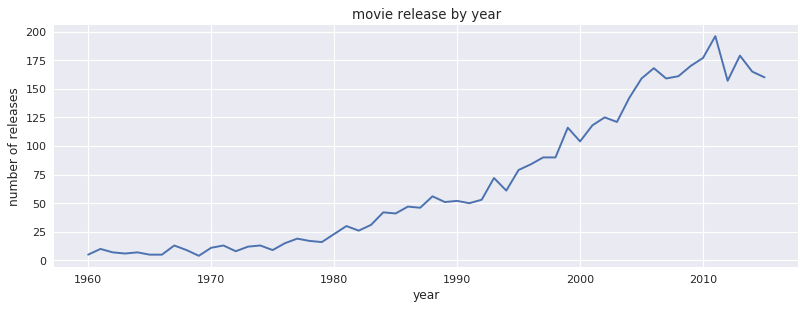

Year with the highest amount of movie releases is : 2015
Year with the lowest amount of movie releases is : 1960


In [ ]:
#create plot for movie release by year
plt.figure(figsize=(12,4), dpi=80, edgecolor='k')
plt.plot(releases)
plt.title('movie release by year')
plt.xlabel('year')
plt.ylabel('number of releases')
plt.show()

#print the min and max years of movie releases
print ('Year with the highest amount of movie releases is :', df['release_year'].max())
print ('Year with the lowest amount of movie releases is :', df['release_year'].min())

We can see that the general trend of movies year on year has increased with a peak in 2015.

### Question 2: What is the average yearly budget & revenue?

next step is to to look at the average revenue, budger for all the years.

In [ ]:
# group revenue and buget collumns by year and the the mean
revenue = df.groupby('release_year')['revenue'].mean()
budget = df.groupby('release_year')['budget'].mean()

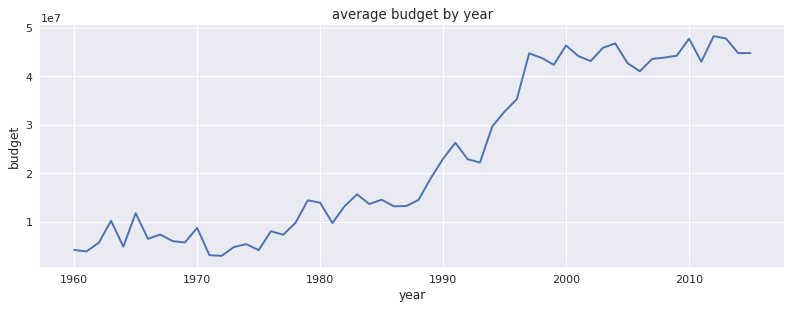

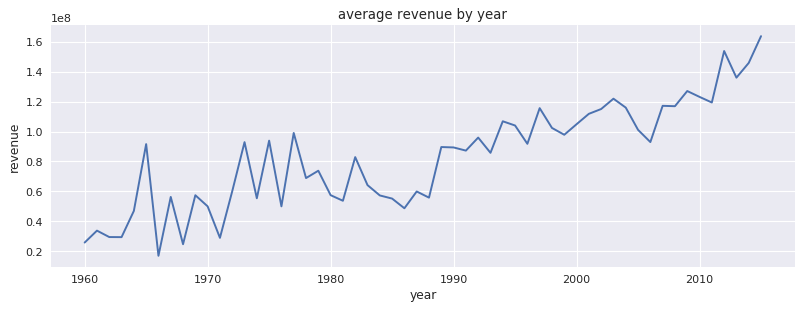

In [ ]:
#plot the average budget and revenue per year
plt.figure(figsize=(12,4), dpi=80, edgecolor='k')
plt.plot(budget)
plt.title('average budget by year')
plt.xlabel('year')
plt.ylabel('budget')

plt.figure(figsize=(12,4), dpi=80, edgecolor='k')
plt.plot(revenue)
plt.title('average revenue by year')
plt.xlabel('year')
plt.ylabel('revenue')

plt.show()

Like the number of movie release year on year the total but budget and revenue also increased.
- revenue increased quite steadily
- budget beteween 1990 and 2000 climbed quite steeply.

### Question: 3 What is yearly average profits?

Next lets look at the average yearly profifts of the movies

In [ ]:
#group the average prof_loss by years
profit = df.groupby('release_year')['prof_loss'].mean()

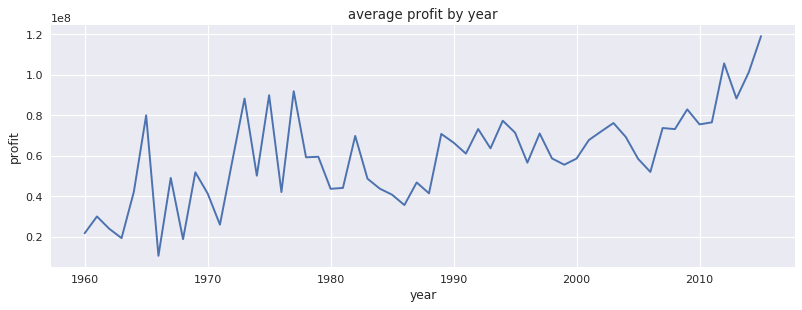

highest average is : 118950907.956
lowest average is : 10493737.8


In [ ]:
#Plot the average profit by year
plt.figure(figsize=(12,4), dpi=80, edgecolor='k')
plt.plot(profit)
plt.title('average profit by year')
plt.xlabel('year')
plt.ylabel('profit')
plt.show()
# find the the min / max average profit
profitx = df.groupby('release_year')['prof_loss'].mean().max()
profitm = df.groupby('release_year')['prof_loss'].mean().min()
#print the min max average profit.
print('highest average is :',profitx)
print('lowest average is :',profitm)

The average movie profit during the years is volatile for rapid changes, but has stayted on an upward trend since around 2008

### Question 4: What are the most profitable movies ?

What movies have mad to most profit to d this we will sort the profit column, and slice the data

In [ ]:
#sorting from high to low profit
df.sort_values(by='prof_loss', ascending = False, inplace = True)

In [ ]:
#slice the data set only showing the top 10 profitable movies
top = df.iloc[0:10]

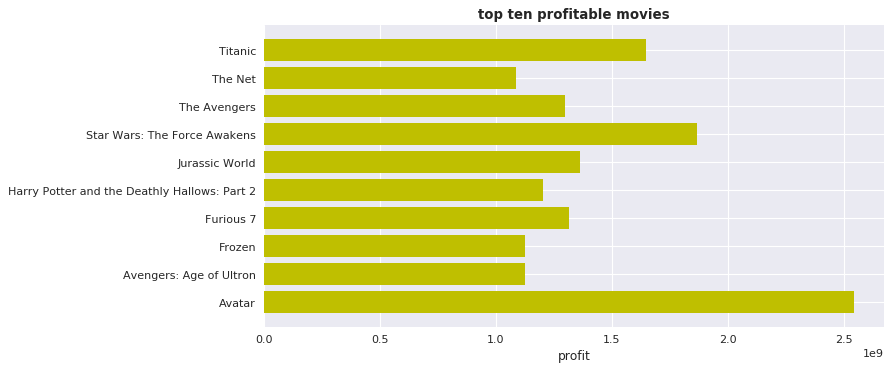

In [ ]:
#plot graph for top ten profit.
plt.figure(figsize=(10,5), dpi=80, edgecolor='k')
plt.barh(top['original_title'], top['prof_loss'], color='y')
plt.title('top ten profitable movies',weight='bold', size='large')
plt.xlabel('profit')
plt.show()

We can clearly see that Avatar is the highest profitable movie of all time and, and was released 2009. Also we can
se that the most common genres are that of action and or adventure. lets check the average runtime of these top 10 movies, this could be used for future refence for deciding the runtime of a new movie.

In [ ]:
#find the mean of the top ten profitable movies
top.runtime.mean(0)

138.30000000000001

lets now count if there are more frequent directors that contribute to the proftable movies.

Text(0.5,0,'Frequency')

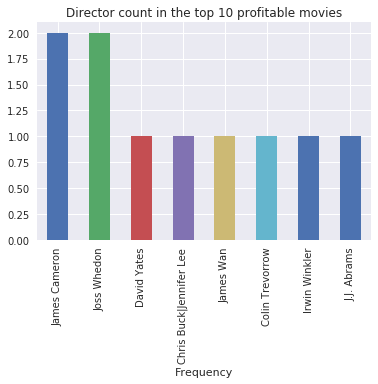

In [ ]:
#find the frequency of directors and plot in bar grpah
direct = top['director'].value_counts()
direct.plot(kind = 'bar')
plt.title('Director count in the top 10 profitable movies')
plt.xlabel('Frequency')

lets now count if there are more frequent genres that contribute to the proftable movies

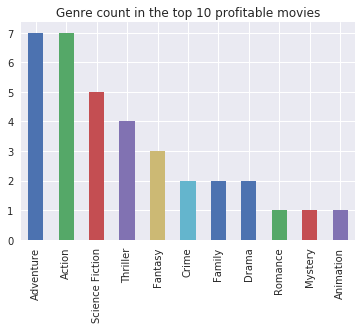

In [ ]:
#convert colum to string 
genre = top['genres'].str.cat(sep = '|')
#store values in panda series, the we can perform a count for genre
genre = pd.Series(genre.split('|'))
genre_freq = genre.value_counts(ascending = False).plot(kind ='bar', title ='Genre count in the top 10 profitable movies')

What we can conlude here is the most profitable move in the dataset is Avatar,
- the most profitible genre is Action / Adventure.
- directors the contributed to the most profitable is James Cameron.
- The average runtime of the top ten movies is 138 minutes.

### Question 5 : Most Popular movies

lets look at the top 10 most movies based on popularity, we will look at popularity and vote_average,  as these seem to have be measured different and would be interesting compare the results.

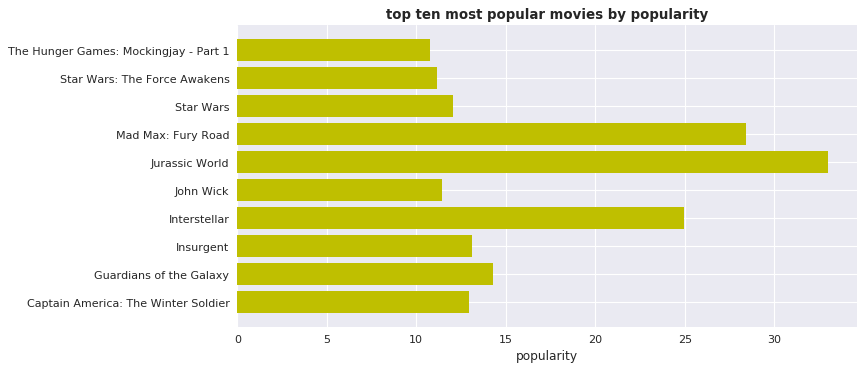

In [ ]:
#sort high to low on popularity and slice for only the top 10 rows.
df.sort_values(by='popularity', ascending = False, inplace = True)
top = df.iloc[0:10]
#plot the the top 10 movies by popularity
plt.figure(figsize=(10,5), dpi=80, edgecolor='k')
plt.barh(top['original_title'], top['popularity'], color='y')
plt.title('top ten most popular movies by popularity',weight='bold', size='large')
plt.xlabel('popularity')
plt.show()

lets now coount the genres for a popular movies,

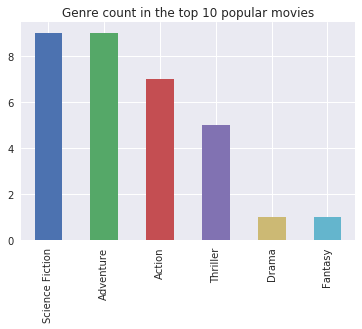

In [ ]:
#convert colum to string 
genre = top['genres'].str.cat(sep = '|')
#store values in panda series, the we can perform a count for genre
genre = pd.Series(genre.split('|'))
genre_freq = genre.value_counts(ascending = False).plot(kind ='bar', title ='Genre count in the top 10 popular movies')

- The most popular movie is Jurasic Park
- The most popular genres are Science Fiction and Adventure.

Lets now take a look at vote average and see if there is a different result.

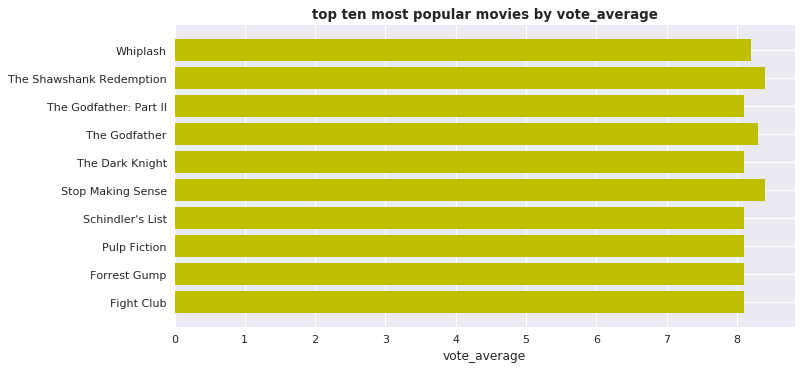

In [ ]:
#sorting by vote average and take the top 10 rows.
df.sort_values(by='vote_average', ascending = False, inplace = True)
top = df.iloc[0:10]
#plot the the top 10 movies by vote average
plt.figure(figsize=(10,5), dpi=80, edgecolor='k')
plt.barh(top['original_title'], top['vote_average'], color='y')
plt.title('top ten most popular movies by vote_average',weight='bold', size='large')
plt.xlabel('vote_average')
plt.show()

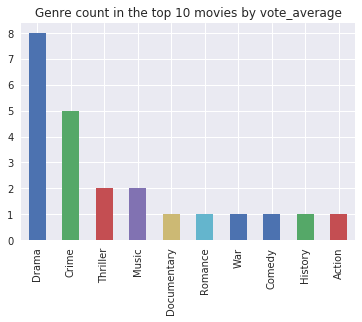

In [ ]:
#convert colum to string 
genre = top['genres'].str.cat(sep = '|')
#store values in panda series, the we can perform a count for genre
genre = pd.Series(genre.split('|'))
genre_freq = genre.value_counts(ascending = False).plot(kind ='bar', title ='Genre count in the top 10 movies by vote_average')

- Top movies by vote average are The Shawshank Redemption and Stop Making Sense
- The top 2 genres by vote average are Drama and Crime
    

### Questions 6:  Budget Vs Profit

Lets check if more movie budget returns more profit.

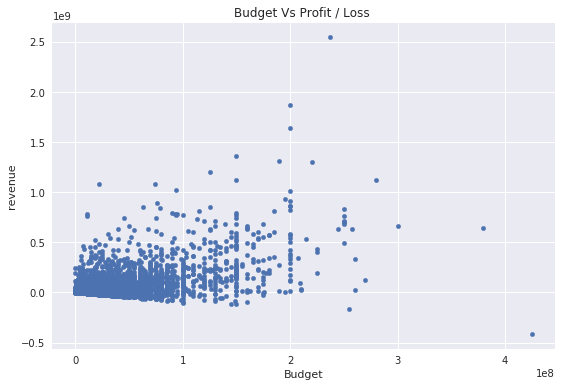

In [ ]:
#plot the budget and prof_loss
df.plot.scatter(x='budget' , y='prof_loss',figsize=(9,6), title = 'Budget Vs Profit / Loss ')
plt.xlabel('Budget')
plt.ylabel('revenue')
plt.show()

We can see clearly that more budget does not always mean more profits.

### Questions 7:  Average Runtimes by year

Let take a look at the average movie runtimes  year on year.

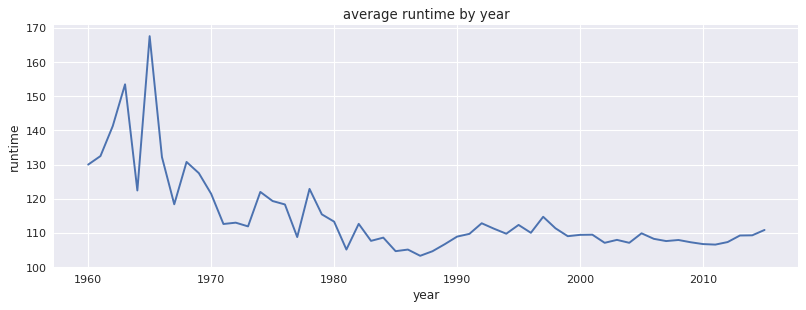

Total runtime average for movies are: 109.351116951


In [ ]:
#find the average runtime by year
runtime = df.groupby('release_year')['runtime'].mean()
#Plot the average runtime by year
plt.figure(figsize=(12,4), dpi=80, edgecolor='k')
plt.plot(runtime)
plt.title('average runtime by year')
plt.xlabel('year')
plt.ylabel('runtime')
plt.show()

#runtime average
runtime_avg = df.runtime.mean()
print('Total runtime average for movies are:',runtime_avg)

<a id='conclusions'></a>
# Conclusions

The movie set contains alot of information regarding movies, there was only one duplicated row, but there was a lot of other information missing from the dataset and many zero within the columns and a decision was required, for the above analysis these values entries were removed.

New movies should consider the below to be a profitable movie.
    - movie genre should be either Action / Adventure.
    - should have either Jamers Cameron or Joss Whedon as the director to be most profitable.
    - average run time of around 138 minutes.
  
- To have the most popular movies, the movie should be either or a combination of Science Fiction, Adventure and Action
- Looking at the vote average we get a different result, the movire should be either Drama or Crime.

There is strong releationship to of the budget and the profit made. We can see there are few outliers where there are some high budget and low profit returns in some cases only a loss.

# Limitations

There were many values of zero value in the budget and revenure, we could inpute these using the mean but i beleive this would
not reflect correctly and would skew the data of these columns and explorations involving these. Another way that could fill
the data would be to check again the source website and use web searches to update the dataset.

Also the data set does not only contain movies this also includes tv series and there is no column avaialble to determine this.
For example Taken has runtime of 800+ minutes, after checking the imdb site for Taken https://www.imdb.com/title/tt0289830/, we can see thies was a TV Mini-Series, again there is no indication in the in the dataset that determines this.

Dataset - Populairty column is made up of many variables and could skew results. 
- Number of votes for the day
- Number of views for the day
- Number of users who marked it as a "favourite" for the day
- Number of users who added it to their "watchlist" for the day
- Release date
- Number of total votes
- Previous days score

https://developers.themoviedb.org/3/getting-started/popularity


Other Resources:
    
    https://pythonspot.com/matplotlib-bar-chart/
    https://stackoverflow.com/questions/45003806/python-pandas-use-slice-with-describe-versions-greater-than-0-20
    https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html
    https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html
    https://stackoverflow.com/questions/29229600/counting-number-of-zeros-per-row-by-pandas-dataframe
    https://stackoverflow.com/questions/12504976/get-last-column-after-str-split-operation-on-column-in-pandas-dataframe   